# Homework: Linearized Flow
Create a MATLAB/Python code that calculates the critical Mach number, based on the critical pressure coefficient eq. and compressibility correction (Prandtl Glauert, Laitone, and Karman-Tsien)
Hint: You need to find the value of $M$ so that the $C_p$ matches
$$
C_p = \frac{C_{p_0}}{\sqrt{1-M_{\infty}^2}}
$$
$$
C_{p_{cr}} = \frac{2}{\gamma M_{cr}^2} \left[\left(\frac{1+\frac{\gamma-1}{2}M_{cr}^2}{1+\frac{\gamma-1}{2}}\right)^{\frac{\gamma}{\gamma-1}}-1\right]
$$

# Answer

In [3]:
gamma = 1.4
Cp0 = -1

In [7]:
from numpy import sqrt

minimum_float = 1.175494351e-38

MmaxPrandtlGlauert = 1
MmaxLaitone = sqrt((2-Cp0-sqrt((2-Cp0)**2-4*((gamma-1)*Cp0)))/((gamma-1)*Cp0))
MmaxKarmanTsien = sqrt(1 - ((1-sqrt(1+Cp0*(Cp0-2)))/(Cp0-2))**2)

def correction(M):
    return sqrt(1 - M**2)

def criticalPressureCoefficients(Mcr, gamma_=gamma):
    return 2 / (gamma_ * Mcr**2) * (((1 + (gamma_ - 1) / 2 * Mcr**2) / (1 + (gamma_ - 1) / 2))**(gamma_ / (gamma_ - 1)) - 1)

def prandtlGlauert(Minf, Cp0_=Cp0):
    return Cp0_ / correction(Minf)

def laitone(Minf, Cp0_=Cp0, gamma_=gamma):
    return Cp0_ / (correction(Minf) + (Minf**2 * (1 + (gamma_ - 1)/2 * Minf**2) / (2 * correction(Minf))) * Cp0_)

def karmanTsien(Minf, Cp0_=Cp0):
    return Cp0_ / (correction(Minf) + (Minf**2 / (1 + correction(Minf))) * Cp0_ / 2)

def rootFuncPrandtlGlauert(Mcr, Cp0_=Cp0, gamma_=gamma):
    return criticalPressureCoefficients(Mcr, gamma_) - prandtlGlauert(Mcr, Cp0_)

def rootFuncLaitone(Mcr, Cp0_=Cp0, gamma_=gamma):
    return criticalPressureCoefficients(Mcr, gamma_) - laitone(Mcr, Cp0_, gamma_)

def rootFuncKarmanTsien(Mcr, Cp0_=Cp0, gamma_=gamma):
    return criticalPressureCoefficients(Mcr, gamma_) - karmanTsien(Mcr, Cp0_)

def bisectionMethodPrandtlGlauert(Mil, Miu, iter, Cp0_=Cp0, gamma_=gamma):
    Mil_ = Mil
    Miu_ = Miu
    Mi_ = (Mil_ + Miu_) / 2
    n_ = iter
    i = n_

    while (i > 0 and abs(rootFuncPrandtlGlauert(Mi_, Cp0_, gamma_)) > 10e-16):
        if (rootFuncPrandtlGlauert(Mil_, Cp0_, gamma_) * rootFuncPrandtlGlauert(Mi_, Cp0_, gamma_) < 0):
            Miu_ = Mi_
        else:
            Mil_ = Mi_
        
        Mi_ = (Mil_ + Miu_) / 2

        i = i - 1

    return Mi_

def bisectionMethodLaitone(Mil, Miu, iter, Cp0_=Cp0, gamma_=gamma):
    Mil_ = Mil
    Miu_ = Miu
    Mi_ = (Mil_ + Miu_) / 2
    n_ = iter
    i = n_

    while (i > 0 and abs(rootFuncLaitone(Mi_, Cp0_, gamma_)) > 10e-16):
        if (rootFuncLaitone(Mil_, Cp0_, gamma_) * rootFuncLaitone(Mi_, Cp0_, gamma_) < 0):
            Miu_ = Mi_
        else:
            Mil_ = Mi_
        
        Mi_ = (Mil_ + Miu_) / 2

        i = i - 1

    return Mi_

def bisectionMethodKarmanTsien(Mil, Miu, iter, Cp0_=Cp0, gamma_=gamma):
    Mil_ = Mil
    Miu_ = Miu
    Mi_ = (Mil_ + Miu_) / 2
    n_ = iter
    i = n_

    while (i > 0 and abs(rootFuncKarmanTsien(Mi_, Cp0_, gamma_)) > 10e-16):
        if (rootFuncKarmanTsien(Mil_, Cp0_, gamma_) * rootFuncKarmanTsien(Mi_, Cp0_, gamma_) < 0):
            Miu_ = Mi_
        else:
            Mil_ = Mi_
        
        Mi_ = (Mil_ + Miu_) / 2

        i = i - 1

    return Mi_

nIter = 5000

McrPrandtlGlauert = bisectionMethodPrandtlGlauert(minimum_float, MmaxPrandtlGlauert, nIter, Cp0, gamma)
McrLaitone = bisectionMethodLaitone(minimum_float, MmaxLaitone, nIter, Cp0, gamma)
McrKarmanTsien = bisectionMethodKarmanTsien(minimum_float, MmaxKarmanTsien, nIter, Cp0, gamma)

print(f"Incompressible Pressure Constant (Cp0): {Cp0}\n")
print("Critical Mach Numbers")
print("------------------------------------------")
print(f"Prandtl-Glauert\t\t{McrPrandtlGlauert}")
print(f"Laitone\t\t\t{McrLaitone}")
print(f"Karman-Tsien\t\t{McrKarmanTsien}")

Incompressible Pressure Constant (Cp0): -1

Critical Mach Numbers
------------------------------------------
Prandtl-Glauert		0.6059067449116082
Laitone			0.5586457923430964
Karman-Tsien		0.5848342789020025


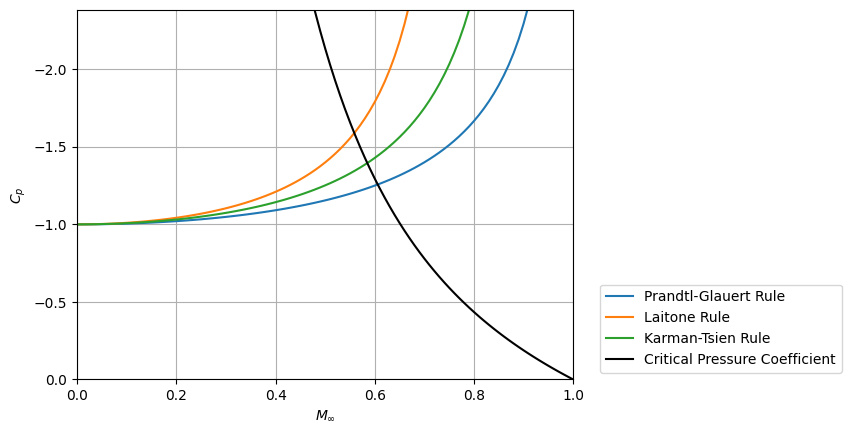

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
from math import floor

detail = 100

minCp = 0
maxCp = criticalPressureCoefficients(McrLaitone, gamma) * 1.5

minM = 0
maxM = 1

Cps = [i/detail for i in range(floor(maxCp)*detail, minCp)]
MPrandtlGlauert = [i/detail for i in range(minM, floor(maxM*detail))]
MLaitone = [i/detail for i in range(minM, floor(MmaxLaitone*detail))]
MKarmanTsien = [i/detail for i in range(minM, floor(MmaxKarmanTsien*detail))]
MCrits = [i/detail for i in range(maxM*detail, minM, -1)]

CpPrandtlGlauert = [prandtlGlauert(M, Cp0) for M in MPrandtlGlauert]
CpLaitone = [laitone(M, Cp0, gamma) for M in MLaitone]
CpKarmanTsien = [karmanTsien(M, Cp0) for M in MKarmanTsien]
CpCrs = [criticalPressureCoefficients(M, gamma) for M in MCrits]

plt.plot(MPrandtlGlauert, CpPrandtlGlauert, label="Prandtl-Glauert Rule", color="tab:blue")
plt.plot(MLaitone, CpLaitone, label="Laitone Rule", color="tab:orange")
plt.plot(MKarmanTsien, CpKarmanTsien, label="Karman-Tsien Rule", color="tab:green")
plt.plot(MCrits, CpCrs, label="Critical Pressure Coefficient", color="black")

plt.xlabel(r"$M_\infty$")
plt.ylabel(r"$C_p$")

plt.grid()

plt.xlim(minM, maxM)
plt.ylim(maxCp, minCp)

plt.legend(bbox_to_anchor=(1.04, 0), loc="lower left")

plt.gca().invert_yaxis()

plt.show()

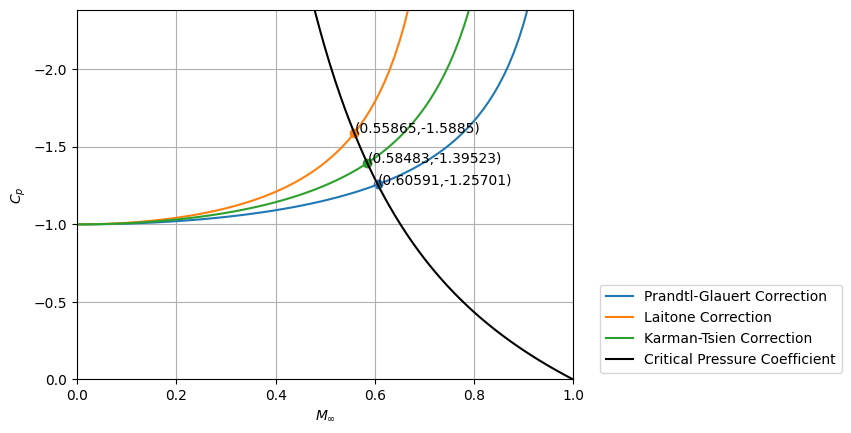

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
from math import floor

detail = 100

minCp = 0
maxCp = criticalPressureCoefficients(McrLaitone, gamma) * 1.5

minM = 0
maxM = 1

Cps = [i/detail for i in range(floor(maxCp)*detail, minCp)]
MPrandtlGlauert = [i/detail for i in range(minM, floor(MmaxPrandtlGlauert*detail))]
MLaitone = [i/detail for i in range(minM, floor(MmaxLaitone*detail))]
MKarmanTsien = [i/detail for i in range(minM, floor(MmaxKarmanTsien*detail))]
MCrits = [i/detail for i in range(maxM*detail, minM, -1)]

CpPrandtlGlauert = [prandtlGlauert(M, Cp0) for M in MPrandtlGlauert]
CpLaitone = [laitone(M, Cp0, gamma) for M in MLaitone]
CpKarmanTsien = [karmanTsien(M, Cp0) for M in MKarmanTsien]
CpCrs = [criticalPressureCoefficients(M, gamma) for M in MCrits]

plt.plot(MPrandtlGlauert, CpPrandtlGlauert, label="Prandtl-Glauert Rule", color="tab:blue")
plt.plot(MLaitone, CpLaitone, label="Laitone Rule", color="tab:orange")
plt.plot(MKarmanTsien, CpKarmanTsien, label="Karman-Tsien Rule", color="tab:green")
plt.plot(MCrits, CpCrs, label="Critical Pressure Coefficient", color="black")

plt.scatter(McrPrandtlGlauert, criticalPressureCoefficients(McrPrandtlGlauert, gamma), color="tab:blue")
plt.scatter(McrLaitone, criticalPressureCoefficients(McrLaitone, gamma), color="tab:orange")
plt.scatter(McrKarmanTsien, criticalPressureCoefficients(McrKarmanTsien, gamma), color="tab:green")

plt.annotate(f"({round(McrPrandtlGlauert,5)},{round(criticalPressureCoefficients(McrPrandtlGlauert, gamma),5)})", (McrPrandtlGlauert, criticalPressureCoefficients(McrPrandtlGlauert, gamma)))
plt.annotate(f"({round(McrLaitone,5)},{round(criticalPressureCoefficients(McrLaitone, gamma),5)})", (McrLaitone, criticalPressureCoefficients(McrLaitone, gamma)))
plt.annotate(f"({round(McrKarmanTsien,5)},{round(criticalPressureCoefficients(McrKarmanTsien, gamma),5)})", (McrKarmanTsien, criticalPressureCoefficients(McrKarmanTsien, gamma)))

plt.xlabel(r"$M_\infty$")
plt.ylabel(r"$C_p$")

plt.grid()

plt.xlim(minM, maxM)
plt.ylim(maxCp, minCp)

plt.legend(bbox_to_anchor=(1.04, 0), loc="lower left")

plt.gca().invert_yaxis()

plt.show()

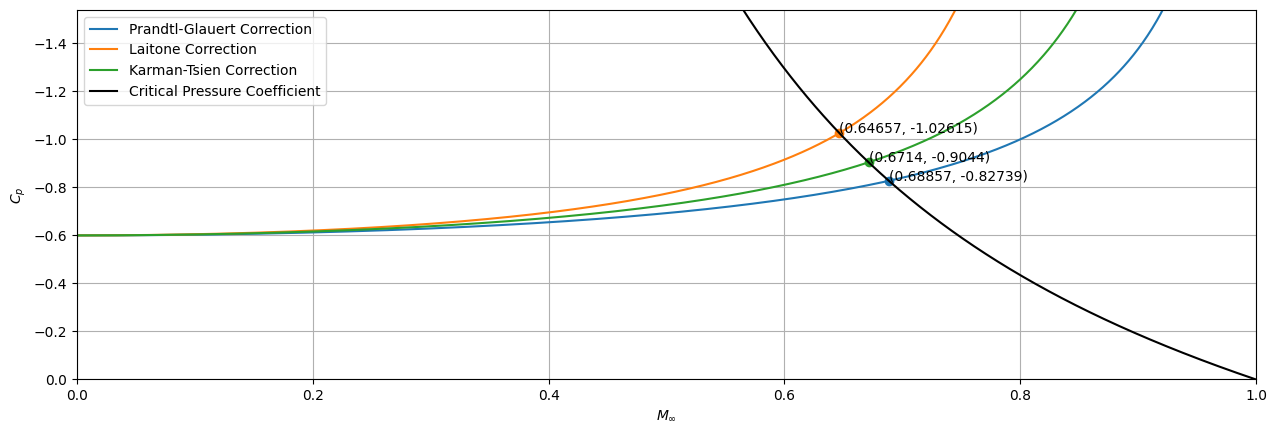

In [27]:
from tkinter import *
from tkinter import ttk

from matplotlib.backend_bases import key_press_handler
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg,
                                               NavigationToolbar2Tk)
from matplotlib.figure import Figure

root = Tk()
root.title("Critical Mach Number Calculator")

content = ttk.Frame(root, padding="3 3 12 12")
content.grid(column=0, row=0, sticky=(N, S, E, W), columnspan=2, rowspan=10)

gamma = StringVar()
ttk.Label(content, text=r"Specific Heat Ratio").grid(column=0, row=1, sticky=(W, E))

gamma_entry = ttk.Entry(content, width=7, textvariable=gamma)
gamma_entry.grid(column=1, row=1, sticky=(W, E))

Cp0 = StringVar()
ttk.Label(content, text="Incompressible Pressure Coefficient").grid(column=0, row=2, sticky=(W, E))

Cp0_entry = ttk.Entry(content, width=7, textvariable=Cp0)
Cp0_entry.grid(column=1, row=2, sticky=(W, E))

ttk.Label(content, text="\n").grid(column=0, row=4, columnspan=2)
ttk.Label(content, text="Critical Mach Number").grid(column=0, row=5, columnspan=2)

ttk.Label(content, text="Prandtl-Glauert Rule").grid(column=0, row=6, sticky=(W, E))
ttk.Label(content, text="Laitone Rule").grid(column=0, row=7, sticky=(W, E))
ttk.Label(content, text="Karman-Tsien Rule").grid(column=0, row=8, sticky=(W, E))

labelPrandtlGlauert_text = StringVar()
labelLaitone_text = StringVar()
labelKarmanTsien_text = StringVar()

labelPrandtlGlauert = ttk.Entry(content, textvariable=labelPrandtlGlauert_text, state="readonly")
labelPrandtlGlauert.grid(column=1, row=6, sticky=(W, E))

labelLaitone = ttk.Entry(content, textvariable=labelLaitone_text, state="readonly")
labelLaitone.grid(column=1, row=7, sticky=(W, E))

labelKarmanTsien = ttk.Entry(content, textvariable=labelKarmanTsien_text, state="readonly")
labelKarmanTsien.grid(column=1, row=8, sticky=(W, E))

ttk.Label(content, text="\n").grid(column=0, row=9, columnspan=2)

def buttonCommand(nIter=1000):
    minimum_float = 1.175494351e-38

    Cp0 = float(Cp0_entry.get())
    gamma = float(gamma_entry.get())

    MmaxPrandtlGlauert = 1
    MmaxLaitone = sqrt((2-Cp0-sqrt((2-Cp0)**2-4*((gamma-1)*Cp0)))/((gamma-1)*Cp0))
    MmaxKarmanTsien = sqrt(1 - ((1-sqrt(1+Cp0*(Cp0-2)))/(Cp0-2))**2)
    
    McrPrandtlGlauert = bisectionMethodPrandtlGlauert(minimum_float, MmaxPrandtlGlauert, nIter, Cp0, gamma)
    McrLaitone = bisectionMethodLaitone(minimum_float, MmaxLaitone, nIter, Cp0, gamma)
    McrKarmanTsien = bisectionMethodKarmanTsien(minimum_float, MmaxKarmanTsien, nIter, Cp0, gamma)

    labelPrandtlGlauert_text.set(f"{McrPrandtlGlauert}")
    labelLaitone_text.set(f"{McrLaitone}")
    labelKarmanTsien_text.set(f"{McrKarmanTsien}")

    fig, ax = plt.subplots(1, 1)
    ax.set_xlabel(r"$M_\infty$")
    ax.set_ylabel(r"$C_p$")
    ax.grid()

    detail = 1000

    minCp = 0
    maxCp = criticalPressureCoefficients(McrLaitone, gamma) * 1.5

    minM = 0
    maxM = 1

    MPrandtlGlauerts = [i/detail for i in range(minM, floor(MmaxPrandtlGlauert*detail))]
    MLaitones = [i/detail for i in range(minM, floor(MmaxLaitone*detail))]
    MKarmanTsiens = [i/detail for i in range(minM, floor(MmaxKarmanTsien*detail))]
    MCrits = [i/detail for i in range(maxM*detail, minM, -1)]

    CpPrandtlGlauert = [prandtlGlauert(M, Cp0) for M in MPrandtlGlauerts]
    CpLaitone = [laitone(M, Cp0, gamma) for M in MLaitones]
    CpKarmanTsien = [karmanTsien(M, Cp0) for M in MKarmanTsiens]
    CpCrs = [criticalPressureCoefficients(M, gamma) for M in MCrits]

    ax.plot(MPrandtlGlauerts, CpPrandtlGlauert, label="Prandtl-Glauert Rule", color="tab:blue")
    ax.plot(MLaitones, CpLaitone, label="Laitone Rule", color="tab:orange")
    ax.plot(MKarmanTsiens, CpKarmanTsien, label="Karman-Tsien Rule", color="tab:green")
    ax.plot(MCrits, CpCrs, label="Critical Pressure Coefficient", color="black")

    resultMcrs = [McrPrandtlGlauert, McrLaitone, McrKarmanTsien]
    resultCpcrs = [criticalPressureCoefficients(M, gamma) for M in resultMcrs]

    ax.scatter(resultMcrs[0], resultCpcrs[0], color="tab:blue")
    ax.scatter(resultMcrs[1], resultCpcrs[1], color="tab:orange")
    ax.scatter(resultMcrs[2], resultCpcrs[2], color="tab:green")

    for i in range(0, len(resultMcrs)):
        ax.annotate(f"({round(resultMcrs[i], 5)}, {round(resultCpcrs[i], 5)})", (resultMcrs[i], resultCpcrs[i]))

    ax.set_xlim(minM, maxM)
    ax.set_ylim(maxCp, minCp)
    ax.invert_yaxis()
    ax.legend()

    fig.tight_layout

    canvas = FigureCanvasTkAgg(fig, master=content)
    canvas.draw()
    canvas.get_tk_widget().grid(column=0, row=11, columnspan=2, sticky=(N, S, E, W))

    ttk.Label(content, text="Plot").grid(column=0, row=10, columnspan=2)

calculateButton = ttk.Button(content, text="Calculate", command=buttonCommand)
calculateButton.grid(column=0, row=3, columnspan=2)

root.columnconfigure(0, weight=1)
root.rowconfigure(0, weight=1)

content.columnconfigure(1, weight=1)

root.mainloop()